<a href="https://colab.research.google.com/github/karolke99/PiAE/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Zadanie 1.

W programie R pokaż następujące rozkłady:
- Binomial (Dwumianowy)
- Hypergeometrical (Hipergeometryczny)
- Chi square (Chi kwadrat)
- Exponential (Wykładniczy)
- Weibull

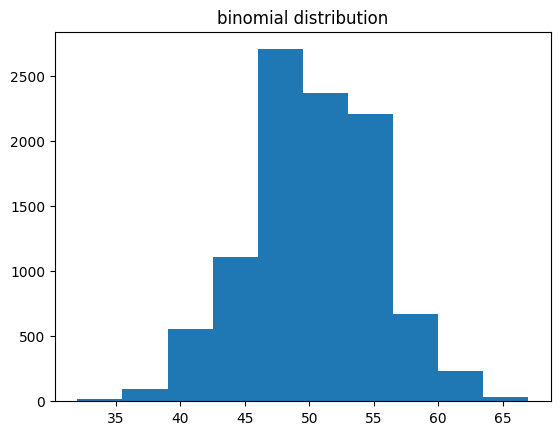

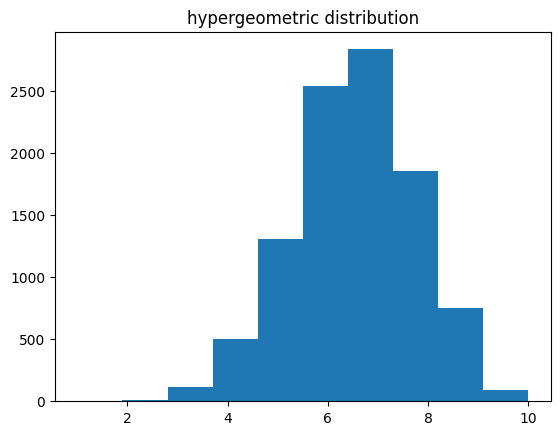

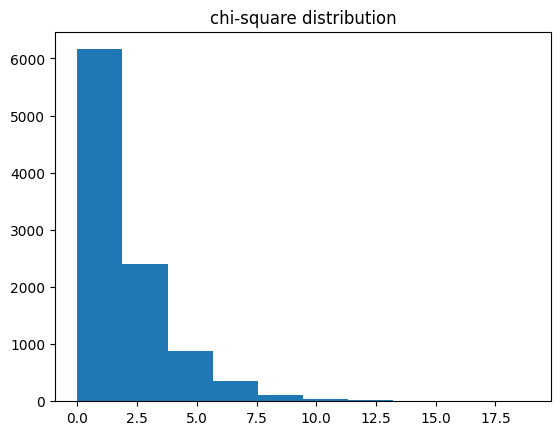

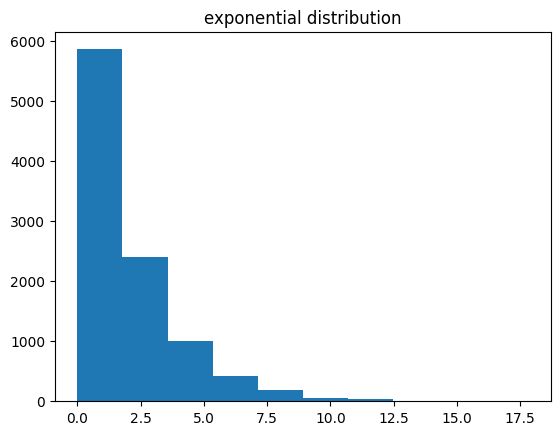

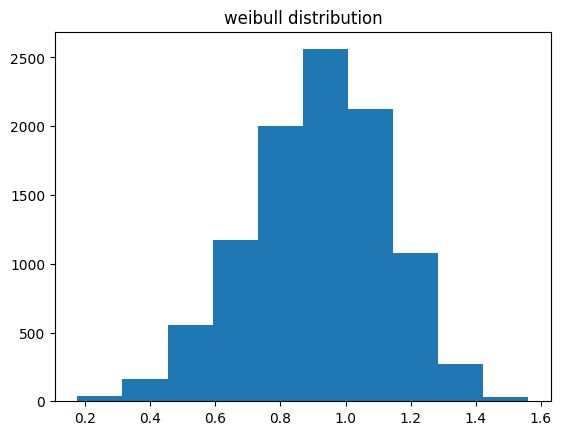

In [45]:
import numpy as np
import matplotlib.pyplot as plt


def generate_distribution(dist, **kwargs):
    distributions = {
        'binomial': np.random.binomial,
        'hypergeometric': np.random.hypergeometric,
        'chi-square': np.random.chisquare,
        'exponential': np.random.exponential,
        'weibull': np.random.weibull
    }

    if dist not in distributions:
        print('Unsupported distribution')
        return

    sample = distributions[dist](**kwargs)
    plt.figure()
    plt.hist(sample)
    plt.title(f'{dist} distribution')
    plt.show()
    # plt.savefig(f"zad1-{dist}.png")

generate_distribution('binomial', n=100, p=0.5, size=10000)
generate_distribution('hypergeometric', ngood=40, nbad=20, nsample=10, size=10000)
generate_distribution('chi-square', df=2, size=10000)
generate_distribution('exponential', scale=2, size=10000)
generate_distribution('weibull', a=5, size=10000)

# Zadanie 2

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


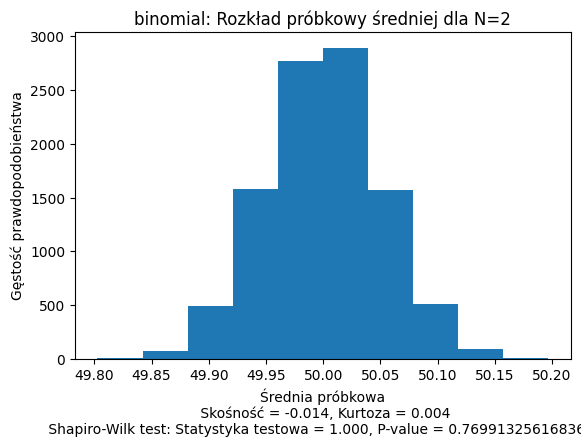

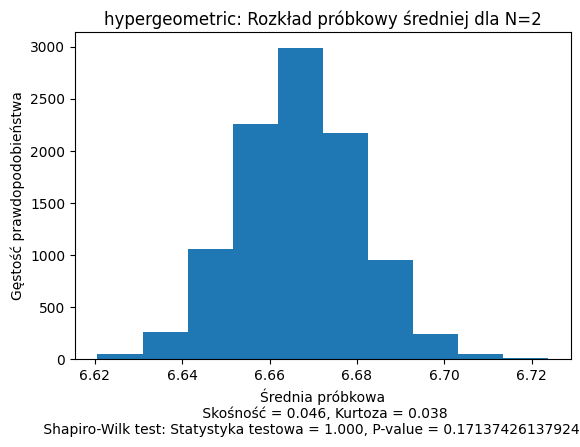

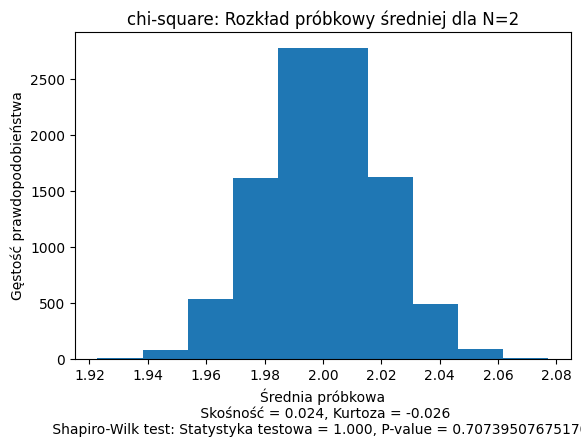

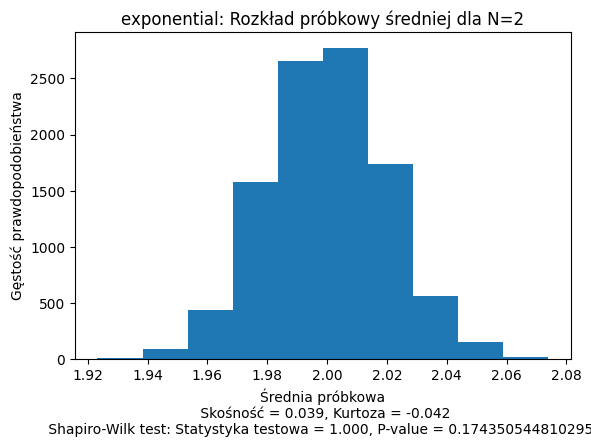

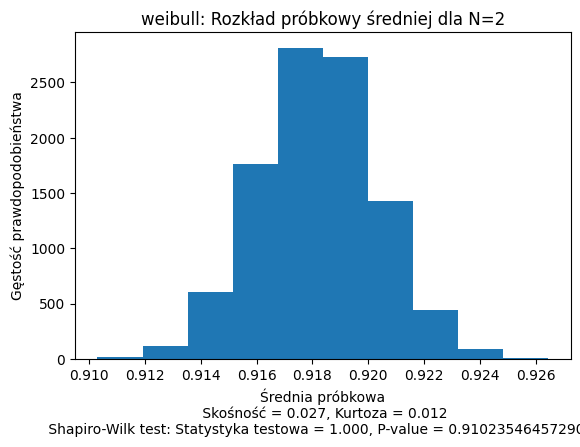

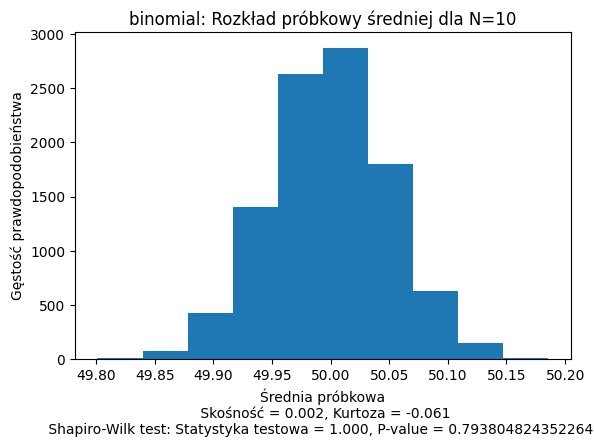

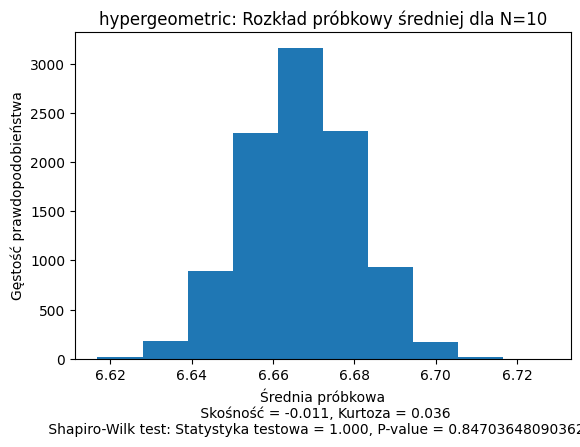

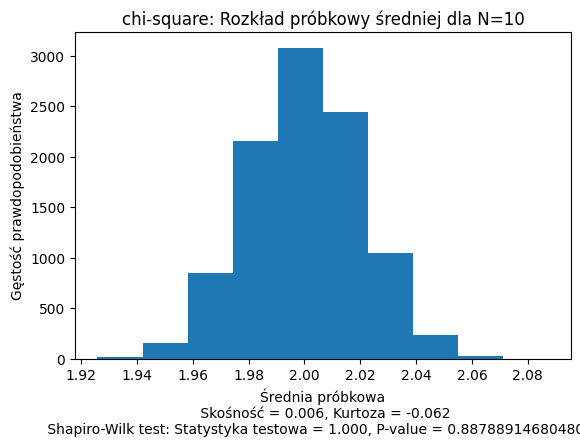

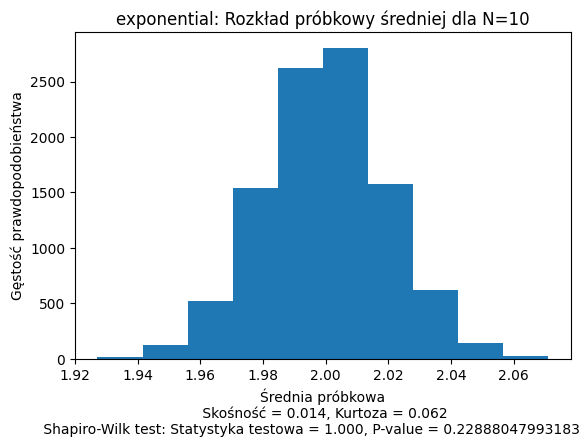

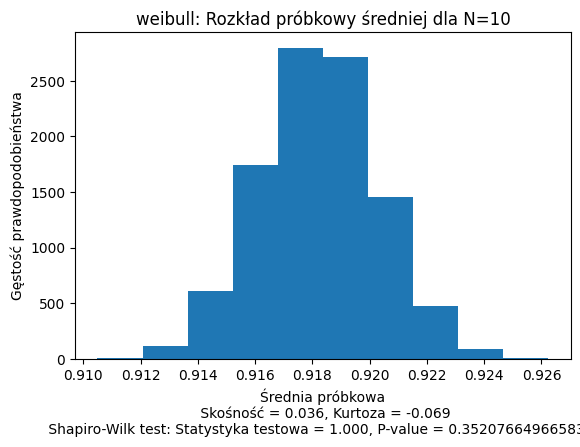

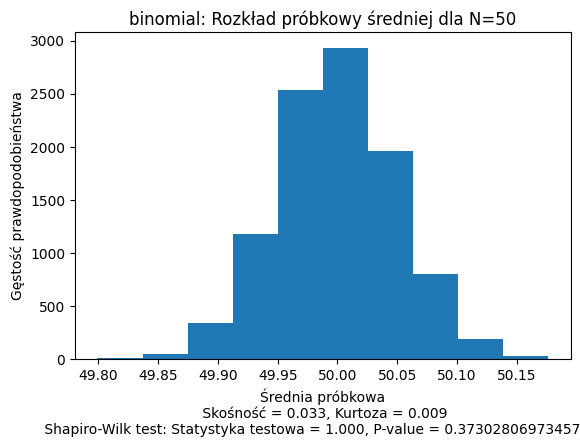

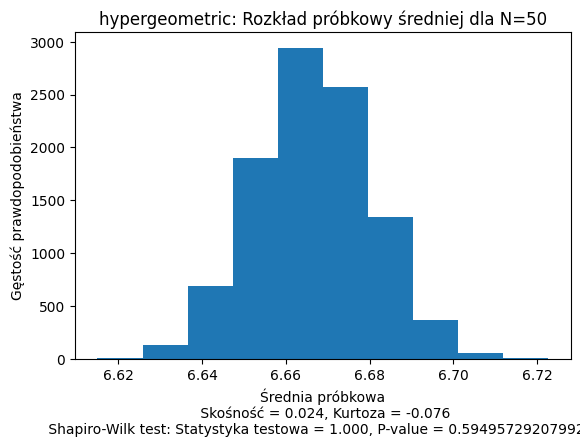

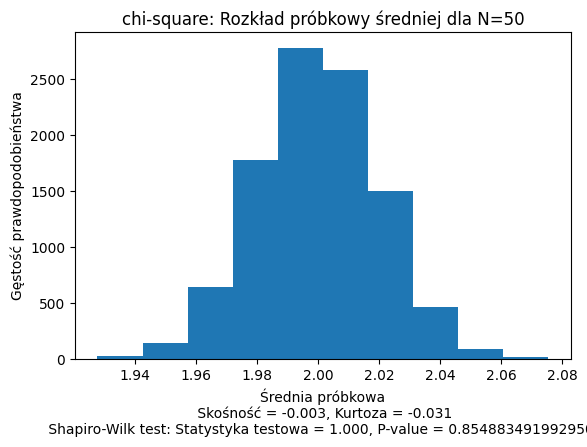

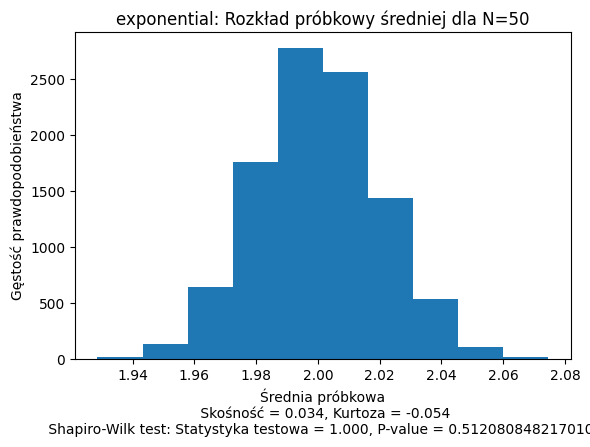

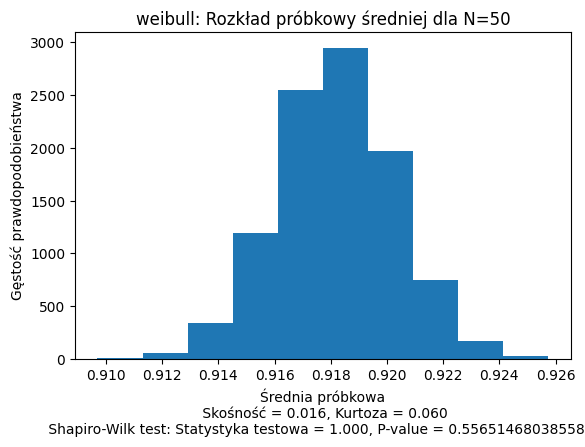

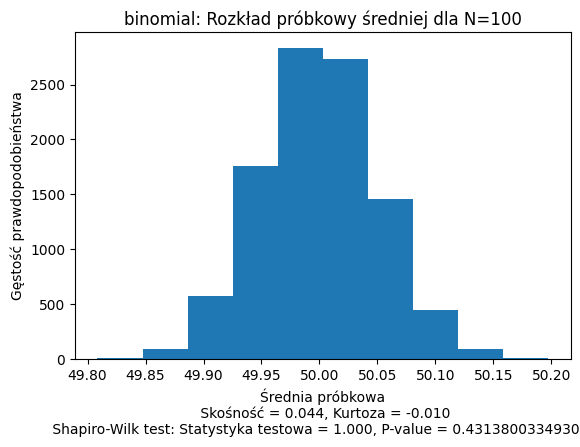

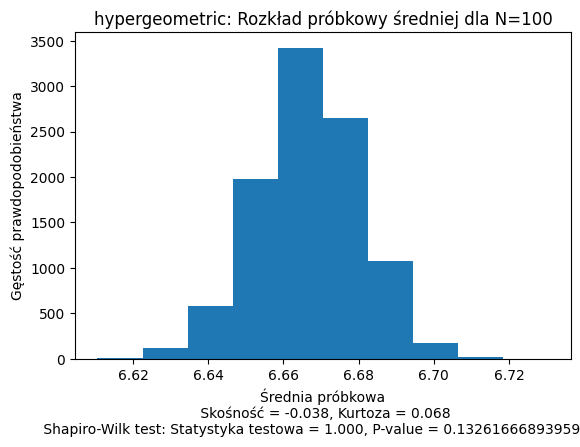

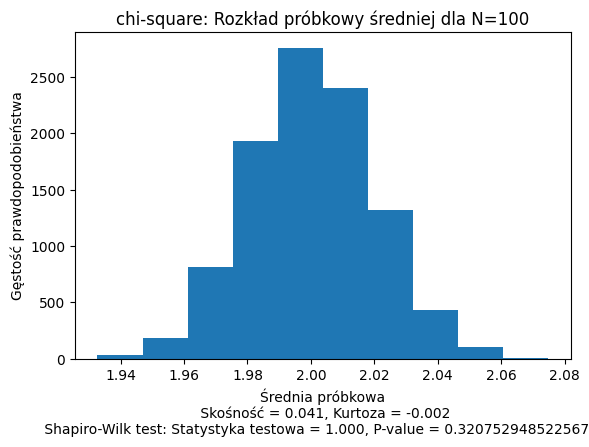

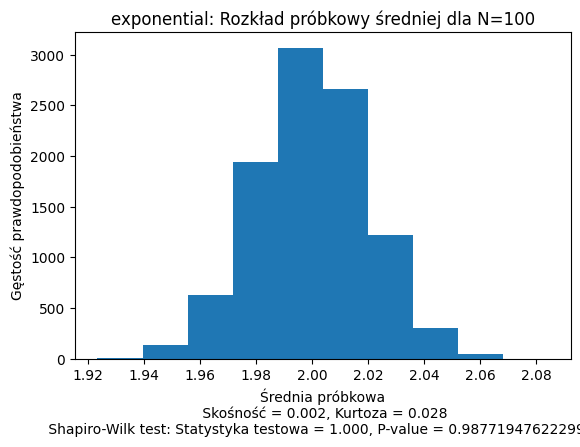

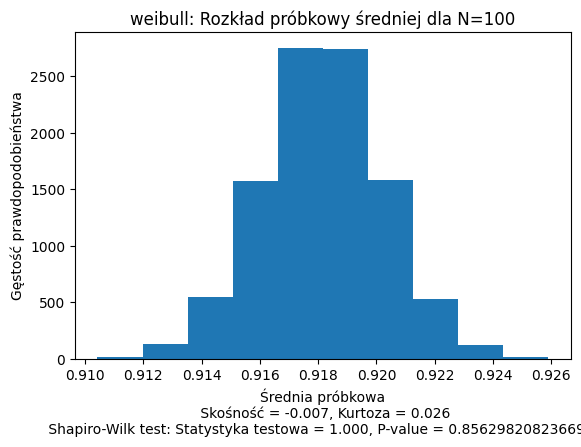

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro


N_values = [2, 10, 50, 100]
num_replications = 10000

def generate_sample_means(N, dist, **kwargs):
    distributions = {
        'binomial': np.random.binomial,
        'hypergeometric': np.random.hypergeometric,
        'chi-square': np.random.chisquare,
        'exponential': np.random.exponential,
        'weibull': np.random.weibull
    }


    if dist not in distributions:
        print('Unsupported distribution')
        return

    sample_means = []

    for _ in range(num_replications):
        sample = distributions[dist](**kwargs)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)


    skewness = skew(sample_means)
    kurt = kurtosis(sample_means)

    stat, p_value = shapiro(sample_means)

    plt.figure()
    plt.subplots_adjust(bottom=0.2)
    plt.hist(sample_means)
    plt.title(f'{dist}: Rozkład próbkowy średniej dla N={N}')
    plt.xlabel(f'Średnia próbkowa\n Skośność = {skewness:.3f}, Kurtoza = {kurt:.3f}\n Shapiro-Wilk test: Statystyka testowa = {stat:.3f}, P-value = {p_value}')
    plt.ylabel('Gęstość prawdopodobieństwa')
    plt.show()
    # plt.savefig(f"zad2-{dist}-{N}.png")


for N in N_values:
    generate_sample_means(N=N, dist='binomial', n=100, p=0.5, size=num_replications)
    generate_sample_means(N=N, dist='hypergeometric', ngood=40, nbad=20, nsample=10, size=num_replications)
    generate_sample_means(N=N, dist='chi-square', df=2, size=num_replications)
    generate_sample_means(N=N, dist='exponential', scale=2, size=num_replications)
    generate_sample_means(N=N, dist='weibull', a=5, size=num_replications)